In [33]:
%%time
# Carga de librerías.
import pandas as pd
import seaborn as sns
from sklearn import preprocessing 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#Carga data cencosud
data = pd.read_csv("DataCencosud.csv")
data



Wall time: 90.9 ms


Date         Open         High          Low        Close  \
0     2000-01-05   544.190979   548.396973   543.448975   544.190979   
1     2000-01-06   536.026978   544.273987   532.728027   536.026978   
2     2000-01-07   540.150024   540.150024   536.026978   540.150024   
3     2000-01-10   560.767029   560.767029   552.520020   560.767029   
4     2000-01-11   569.013000   577.260010   569.013000   569.013000   
...          ...          ...          ...          ...          ...   
5203  2020-07-07  1292.000000  1300.099976  1235.000000  1292.000000   
5204  2020-07-08  1268.199951  1320.000000  1230.099976  1268.199951   
5205  2020-07-09  1221.000000  1259.000000  1200.000000  1221.000000   
5206  2020-07-10  1200.000000  1231.699951  1181.000000  1200.000000   
5207  2020-07-13  1265.000000  1285.000000  1200.000000  1265.000000   

        Adj Close    Volume  
0      476.356293  323165.0  
1      469.210022   78699.0  
2      472.819214  183955.0  
3      490.866150   67543.0  
4      498.084320   44503.0  
...           ...       ...  
5203  1292.000000  588055.0  
5204  1268.199951  306608.0  
5205  1221.000000  517836.0  
5206  1200.000000  456188.0  
5207  1265.000000  451775.0  

[5208 rows x 7 columns]

In [34]:
%%time
"""
Creando lista para comparar las fechas y pasar a numero
"""
import datetime as date

mini = "2000-01-05"
mini = date.datetime.strptime(mini, '%Y-%m-%d')
maxi = "2020-07-13"
maxi = date.datetime.strptime(maxi, '%Y-%m-%d')

list_fecha = pd.date_range(start=mini, end=maxi)
print(list_fecha)



DatetimeIndex(['2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
               '2020-07-12', '2020-07-13'],
              dtype='datetime64[ns]', length=7496, freq='D')
Wall time: 2.26 s
Parser   : 183 ms


In [35]:
%%time
"""
Transformando el campo Date a int comparandola con el numero del dia apartir del
dia 2000-01-05 a 2020-07-13
Se eliminan filas que tengan valor NaN.
"""
data = data.dropna()
data = data.reset_index(drop=True)

i = 0
for fila in list_fecha:
    fila = str(fila)
    print(i , " = " ,fila)
    data['Date'] = data['Date'].replace([fila[:10]],i)
    i = i + 1
print(" Dates Int OK")

0  =  2000-01-05 00:00:00
1  =  2000-01-06 00:00:00
2  =  2000-01-07 00:00:00
3  =  2000-01-08 00:00:00
4  =  2000-01-09 00:00:00
5  =  2000-01-10 00:00:00
6  =  2000-01-11 00:00:00
7  =  2000-01-12 00:00:00
8  =  2000-01-13 00:00:00
9  =  2000-01-14 00:00:00
10  =  2000-01-15 00:00:00
11  =  2000-01-16 00:00:00
12  =  2000-01-17 00:00:00
13  =  2000-01-18 00:00:00
14  =  2000-01-19 00:00:00
15  =  2000-01-20 00:00:00
16  =  2000-01-21 00:00:00
17  =  2000-01-22 00:00:00
18  =  2000-01-23 00:00:00
19  =  2000-01-24 00:00:00
20  =  2000-01-25 00:00:00
21  =  2000-01-26 00:00:00
22  =  2000-01-27 00:00:00
23  =  2000-01-28 00:00:00
24  =  2000-01-29 00:00:00
25  =  2000-01-30 00:00:00
26  =  2000-01-31 00:00:00
27  =  2000-02-01 00:00:00
28  =  2000-02-02 00:00:00
29  =  2000-02-03 00:00:00
30  =  2000-02-04 00:00:00
31  =  2000-02-05 00:00:00
32  =  2000-02-06 00:00:00
33  =  2000-02-07 00:00:00
34  =  2000-02-08 00:00:00
35  =  2000-02-09 00:00:00
36  =  2000-02-10 00:00:00
37  =  2000

299  =  2000-10-30 00:00:00
300  =  2000-10-31 00:00:00
301  =  2000-11-01 00:00:00
302  =  2000-11-02 00:00:00
303  =  2000-11-03 00:00:00
304  =  2000-11-04 00:00:00
305  =  2000-11-05 00:00:00
306  =  2000-11-06 00:00:00
307  =  2000-11-07 00:00:00
308  =  2000-11-08 00:00:00
309  =  2000-11-09 00:00:00
310  =  2000-11-10 00:00:00
311  =  2000-11-11 00:00:00
312  =  2000-11-12 00:00:00
313  =  2000-11-13 00:00:00
314  =  2000-11-14 00:00:00
315  =  2000-11-15 00:00:00
316  =  2000-11-16 00:00:00
317  =  2000-11-17 00:00:00
318  =  2000-11-18 00:00:00
319  =  2000-11-19 00:00:00
320  =  2000-11-20 00:00:00
321  =  2000-11-21 00:00:00
322  =  2000-11-22 00:00:00
323  =  2000-11-23 00:00:00
324  =  2000-11-24 00:00:00
325  =  2000-11-25 00:00:00
326  =  2000-11-26 00:00:00
327  =  2000-11-27 00:00:00
328  =  2000-11-28 00:00:00
329  =  2000-11-29 00:00:00
330  =  2000-11-30 00:00:00
331  =  2000-12-01 00:00:00
332  =  2000-12-02 00:00:00
333  =  2000-12-03 00:00:00
334  =  2000-12-04 0

592  =  2001-08-19 00:00:00
593  =  2001-08-20 00:00:00
594  =  2001-08-21 00:00:00
595  =  2001-08-22 00:00:00
596  =  2001-08-23 00:00:00
597  =  2001-08-24 00:00:00
598  =  2001-08-25 00:00:00
599  =  2001-08-26 00:00:00
600  =  2001-08-27 00:00:00
601  =  2001-08-28 00:00:00
602  =  2001-08-29 00:00:00
603  =  2001-08-30 00:00:00
604  =  2001-08-31 00:00:00
605  =  2001-09-01 00:00:00
606  =  2001-09-02 00:00:00
607  =  2001-09-03 00:00:00
608  =  2001-09-04 00:00:00
609  =  2001-09-05 00:00:00
610  =  2001-09-06 00:00:00
611  =  2001-09-07 00:00:00
612  =  2001-09-08 00:00:00
613  =  2001-09-09 00:00:00
614  =  2001-09-10 00:00:00
615  =  2001-09-11 00:00:00
616  =  2001-09-12 00:00:00
617  =  2001-09-13 00:00:00
618  =  2001-09-14 00:00:00
619  =  2001-09-15 00:00:00
620  =  2001-09-16 00:00:00
621  =  2001-09-17 00:00:00
622  =  2001-09-18 00:00:00
623  =  2001-09-19 00:00:00
624  =  2001-09-20 00:00:00
625  =  2001-09-21 00:00:00
626  =  2001-09-22 00:00:00
627  =  2001-09-23 0

897  =  2002-06-20 00:00:00
898  =  2002-06-21 00:00:00
899  =  2002-06-22 00:00:00
900  =  2002-06-23 00:00:00
901  =  2002-06-24 00:00:00
902  =  2002-06-25 00:00:00
903  =  2002-06-26 00:00:00
904  =  2002-06-27 00:00:00
905  =  2002-06-28 00:00:00
906  =  2002-06-29 00:00:00
907  =  2002-06-30 00:00:00
908  =  2002-07-01 00:00:00
909  =  2002-07-02 00:00:00
910  =  2002-07-03 00:00:00
911  =  2002-07-04 00:00:00
912  =  2002-07-05 00:00:00
913  =  2002-07-06 00:00:00
914  =  2002-07-07 00:00:00
915  =  2002-07-08 00:00:00
916  =  2002-07-09 00:00:00
917  =  2002-07-10 00:00:00
918  =  2002-07-11 00:00:00
919  =  2002-07-12 00:00:00
920  =  2002-07-13 00:00:00
921  =  2002-07-14 00:00:00
922  =  2002-07-15 00:00:00
923  =  2002-07-16 00:00:00
924  =  2002-07-17 00:00:00
925  =  2002-07-18 00:00:00
926  =  2002-07-19 00:00:00
927  =  2002-07-20 00:00:00
928  =  2002-07-21 00:00:00
929  =  2002-07-22 00:00:00
930  =  2002-07-23 00:00:00
931  =  2002-07-24 00:00:00
932  =  2002-07-25 0

1199  =  2003-04-18 00:00:00
1200  =  2003-04-19 00:00:00
1201  =  2003-04-20 00:00:00
1202  =  2003-04-21 00:00:00
1203  =  2003-04-22 00:00:00
1204  =  2003-04-23 00:00:00
1205  =  2003-04-24 00:00:00
1206  =  2003-04-25 00:00:00
1207  =  2003-04-26 00:00:00
1208  =  2003-04-27 00:00:00
1209  =  2003-04-28 00:00:00
1210  =  2003-04-29 00:00:00
1211  =  2003-04-30 00:00:00
1212  =  2003-05-01 00:00:00
1213  =  2003-05-02 00:00:00
1214  =  2003-05-03 00:00:00
1215  =  2003-05-04 00:00:00
1216  =  2003-05-05 00:00:00
1217  =  2003-05-06 00:00:00
1218  =  2003-05-07 00:00:00
1219  =  2003-05-08 00:00:00
1220  =  2003-05-09 00:00:00
1221  =  2003-05-10 00:00:00
1222  =  2003-05-11 00:00:00
1223  =  2003-05-12 00:00:00
1224  =  2003-05-13 00:00:00
1225  =  2003-05-14 00:00:00
1226  =  2003-05-15 00:00:00
1227  =  2003-05-16 00:00:00
1228  =  2003-05-17 00:00:00
1229  =  2003-05-18 00:00:00
1230  =  2003-05-19 00:00:00
1231  =  2003-05-20 00:00:00
1232  =  2003-05-21 00:00:00
1233  =  2003-

1493  =  2004-02-06 00:00:00
1494  =  2004-02-07 00:00:00
1495  =  2004-02-08 00:00:00
1496  =  2004-02-09 00:00:00
1497  =  2004-02-10 00:00:00
1498  =  2004-02-11 00:00:00
1499  =  2004-02-12 00:00:00
1500  =  2004-02-13 00:00:00
1501  =  2004-02-14 00:00:00
1502  =  2004-02-15 00:00:00
1503  =  2004-02-16 00:00:00
1504  =  2004-02-17 00:00:00
1505  =  2004-02-18 00:00:00
1506  =  2004-02-19 00:00:00
1507  =  2004-02-20 00:00:00
1508  =  2004-02-21 00:00:00
1509  =  2004-02-22 00:00:00
1510  =  2004-02-23 00:00:00
1511  =  2004-02-24 00:00:00
1512  =  2004-02-25 00:00:00
1513  =  2004-02-26 00:00:00
1514  =  2004-02-27 00:00:00
1515  =  2004-02-28 00:00:00
1516  =  2004-02-29 00:00:00
1517  =  2004-03-01 00:00:00
1518  =  2004-03-02 00:00:00
1519  =  2004-03-03 00:00:00
1520  =  2004-03-04 00:00:00
1521  =  2004-03-05 00:00:00
1522  =  2004-03-06 00:00:00
1523  =  2004-03-07 00:00:00
1524  =  2004-03-08 00:00:00
1525  =  2004-03-09 00:00:00
1526  =  2004-03-10 00:00:00
1527  =  2004-

1837  =  2005-01-15 00:00:00
1838  =  2005-01-16 00:00:00
1839  =  2005-01-17 00:00:00
1840  =  2005-01-18 00:00:00
1841  =  2005-01-19 00:00:00
1842  =  2005-01-20 00:00:00
1843  =  2005-01-21 00:00:00
1844  =  2005-01-22 00:00:00
1845  =  2005-01-23 00:00:00
1846  =  2005-01-24 00:00:00
1847  =  2005-01-25 00:00:00
1848  =  2005-01-26 00:00:00
1849  =  2005-01-27 00:00:00
1850  =  2005-01-28 00:00:00
1851  =  2005-01-29 00:00:00
1852  =  2005-01-30 00:00:00
1853  =  2005-01-31 00:00:00
1854  =  2005-02-01 00:00:00
1855  =  2005-02-02 00:00:00
1856  =  2005-02-03 00:00:00
1857  =  2005-02-04 00:00:00
1858  =  2005-02-05 00:00:00
1859  =  2005-02-06 00:00:00
1860  =  2005-02-07 00:00:00
1861  =  2005-02-08 00:00:00
1862  =  2005-02-09 00:00:00
1863  =  2005-02-10 00:00:00
1864  =  2005-02-11 00:00:00
1865  =  2005-02-12 00:00:00
1866  =  2005-02-13 00:00:00
1867  =  2005-02-14 00:00:00
1868  =  2005-02-15 00:00:00
1869  =  2005-02-16 00:00:00
1870  =  2005-02-17 00:00:00
1871  =  2005-

2155  =  2005-11-29 00:00:00
2156  =  2005-11-30 00:00:00
2157  =  2005-12-01 00:00:00
2158  =  2005-12-02 00:00:00
2159  =  2005-12-03 00:00:00
2160  =  2005-12-04 00:00:00
2161  =  2005-12-05 00:00:00
2162  =  2005-12-06 00:00:00
2163  =  2005-12-07 00:00:00
2164  =  2005-12-08 00:00:00
2165  =  2005-12-09 00:00:00
2166  =  2005-12-10 00:00:00
2167  =  2005-12-11 00:00:00
2168  =  2005-12-12 00:00:00
2169  =  2005-12-13 00:00:00
2170  =  2005-12-14 00:00:00
2171  =  2005-12-15 00:00:00
2172  =  2005-12-16 00:00:00
2173  =  2005-12-17 00:00:00
2174  =  2005-12-18 00:00:00
2175  =  2005-12-19 00:00:00
2176  =  2005-12-20 00:00:00
2177  =  2005-12-21 00:00:00
2178  =  2005-12-22 00:00:00
2179  =  2005-12-23 00:00:00
2180  =  2005-12-24 00:00:00
2181  =  2005-12-25 00:00:00
2182  =  2005-12-26 00:00:00
2183  =  2005-12-27 00:00:00
2184  =  2005-12-28 00:00:00
2185  =  2005-12-29 00:00:00
2186  =  2005-12-30 00:00:00
2187  =  2005-12-31 00:00:00
2188  =  2006-01-01 00:00:00
2189  =  2006-

2486  =  2006-10-26 00:00:00
2487  =  2006-10-27 00:00:00
2488  =  2006-10-28 00:00:00
2489  =  2006-10-29 00:00:00
2490  =  2006-10-30 00:00:00
2491  =  2006-10-31 00:00:00
2492  =  2006-11-01 00:00:00
2493  =  2006-11-02 00:00:00
2494  =  2006-11-03 00:00:00
2495  =  2006-11-04 00:00:00
2496  =  2006-11-05 00:00:00
2497  =  2006-11-06 00:00:00
2498  =  2006-11-07 00:00:00
2499  =  2006-11-08 00:00:00
2500  =  2006-11-09 00:00:00
2501  =  2006-11-10 00:00:00
2502  =  2006-11-11 00:00:00
2503  =  2006-11-12 00:00:00
2504  =  2006-11-13 00:00:00
2505  =  2006-11-14 00:00:00
2506  =  2006-11-15 00:00:00
2507  =  2006-11-16 00:00:00
2508  =  2006-11-17 00:00:00
2509  =  2006-11-18 00:00:00
2510  =  2006-11-19 00:00:00
2511  =  2006-11-20 00:00:00
2512  =  2006-11-21 00:00:00
2513  =  2006-11-22 00:00:00
2514  =  2006-11-23 00:00:00
2515  =  2006-11-24 00:00:00
2516  =  2006-11-25 00:00:00
2517  =  2006-11-26 00:00:00
2518  =  2006-11-27 00:00:00
2519  =  2006-11-28 00:00:00
2520  =  2006-

2822  =  2007-09-27 00:00:00
2823  =  2007-09-28 00:00:00
2824  =  2007-09-29 00:00:00
2825  =  2007-09-30 00:00:00
2826  =  2007-10-01 00:00:00
2827  =  2007-10-02 00:00:00
2828  =  2007-10-03 00:00:00
2829  =  2007-10-04 00:00:00
2830  =  2007-10-05 00:00:00
2831  =  2007-10-06 00:00:00
2832  =  2007-10-07 00:00:00
2833  =  2007-10-08 00:00:00
2834  =  2007-10-09 00:00:00
2835  =  2007-10-10 00:00:00
2836  =  2007-10-11 00:00:00
2837  =  2007-10-12 00:00:00
2838  =  2007-10-13 00:00:00
2839  =  2007-10-14 00:00:00
2840  =  2007-10-15 00:00:00
2841  =  2007-10-16 00:00:00
2842  =  2007-10-17 00:00:00
2843  =  2007-10-18 00:00:00
2844  =  2007-10-19 00:00:00
2845  =  2007-10-20 00:00:00
2846  =  2007-10-21 00:00:00
2847  =  2007-10-22 00:00:00
2848  =  2007-10-23 00:00:00
2849  =  2007-10-24 00:00:00
2850  =  2007-10-25 00:00:00
2851  =  2007-10-26 00:00:00
2852  =  2007-10-27 00:00:00
2853  =  2007-10-28 00:00:00
2854  =  2007-10-29 00:00:00
2855  =  2007-10-30 00:00:00
2856  =  2007-

3146  =  2008-08-16 00:00:00
3147  =  2008-08-17 00:00:00
3148  =  2008-08-18 00:00:00
3149  =  2008-08-19 00:00:00
3150  =  2008-08-20 00:00:00
3151  =  2008-08-21 00:00:00
3152  =  2008-08-22 00:00:00
3153  =  2008-08-23 00:00:00
3154  =  2008-08-24 00:00:00
3155  =  2008-08-25 00:00:00
3156  =  2008-08-26 00:00:00
3157  =  2008-08-27 00:00:00
3158  =  2008-08-28 00:00:00
3159  =  2008-08-29 00:00:00
3160  =  2008-08-30 00:00:00
3161  =  2008-08-31 00:00:00
3162  =  2008-09-01 00:00:00
3163  =  2008-09-02 00:00:00
3164  =  2008-09-03 00:00:00
3165  =  2008-09-04 00:00:00
3166  =  2008-09-05 00:00:00
3167  =  2008-09-06 00:00:00
3168  =  2008-09-07 00:00:00
3169  =  2008-09-08 00:00:00
3170  =  2008-09-09 00:00:00
3171  =  2008-09-10 00:00:00
3172  =  2008-09-11 00:00:00
3173  =  2008-09-12 00:00:00
3174  =  2008-09-13 00:00:00
3175  =  2008-09-14 00:00:00
3176  =  2008-09-15 00:00:00
3177  =  2008-09-16 00:00:00
3178  =  2008-09-17 00:00:00
3179  =  2008-09-18 00:00:00
3180  =  2008-

3434  =  2009-05-31 00:00:00
3435  =  2009-06-01 00:00:00
3436  =  2009-06-02 00:00:00
3437  =  2009-06-03 00:00:00
3438  =  2009-06-04 00:00:00
3439  =  2009-06-05 00:00:00
3440  =  2009-06-06 00:00:00
3441  =  2009-06-07 00:00:00
3442  =  2009-06-08 00:00:00
3443  =  2009-06-09 00:00:00
3444  =  2009-06-10 00:00:00
3445  =  2009-06-11 00:00:00
3446  =  2009-06-12 00:00:00
3447  =  2009-06-13 00:00:00
3448  =  2009-06-14 00:00:00
3449  =  2009-06-15 00:00:00
3450  =  2009-06-16 00:00:00
3451  =  2009-06-17 00:00:00
3452  =  2009-06-18 00:00:00
3453  =  2009-06-19 00:00:00
3454  =  2009-06-20 00:00:00
3455  =  2009-06-21 00:00:00
3456  =  2009-06-22 00:00:00
3457  =  2009-06-23 00:00:00
3458  =  2009-06-24 00:00:00
3459  =  2009-06-25 00:00:00
3460  =  2009-06-26 00:00:00
3461  =  2009-06-27 00:00:00
3462  =  2009-06-28 00:00:00
3463  =  2009-06-29 00:00:00
3464  =  2009-06-30 00:00:00
3465  =  2009-07-01 00:00:00
3466  =  2009-07-02 00:00:00
3467  =  2009-07-03 00:00:00
3468  =  2009-

3753  =  2010-04-15 00:00:00
3754  =  2010-04-16 00:00:00
3755  =  2010-04-17 00:00:00
3756  =  2010-04-18 00:00:00
3757  =  2010-04-19 00:00:00
3758  =  2010-04-20 00:00:00
3759  =  2010-04-21 00:00:00
3760  =  2010-04-22 00:00:00
3761  =  2010-04-23 00:00:00
3762  =  2010-04-24 00:00:00
3763  =  2010-04-25 00:00:00
3764  =  2010-04-26 00:00:00
3765  =  2010-04-27 00:00:00
3766  =  2010-04-28 00:00:00
3767  =  2010-04-29 00:00:00
3768  =  2010-04-30 00:00:00
3769  =  2010-05-01 00:00:00
3770  =  2010-05-02 00:00:00
3771  =  2010-05-03 00:00:00
3772  =  2010-05-04 00:00:00
3773  =  2010-05-05 00:00:00
3774  =  2010-05-06 00:00:00
3775  =  2010-05-07 00:00:00
3776  =  2010-05-08 00:00:00
3777  =  2010-05-09 00:00:00
3778  =  2010-05-10 00:00:00
3779  =  2010-05-11 00:00:00
3780  =  2010-05-12 00:00:00
3781  =  2010-05-13 00:00:00
3782  =  2010-05-14 00:00:00
3783  =  2010-05-15 00:00:00
3784  =  2010-05-16 00:00:00
3785  =  2010-05-17 00:00:00
3786  =  2010-05-18 00:00:00
3787  =  2010-

4048  =  2011-02-04 00:00:00
4049  =  2011-02-05 00:00:00
4050  =  2011-02-06 00:00:00
4051  =  2011-02-07 00:00:00
4052  =  2011-02-08 00:00:00
4053  =  2011-02-09 00:00:00
4054  =  2011-02-10 00:00:00
4055  =  2011-02-11 00:00:00
4056  =  2011-02-12 00:00:00
4057  =  2011-02-13 00:00:00
4058  =  2011-02-14 00:00:00
4059  =  2011-02-15 00:00:00
4060  =  2011-02-16 00:00:00
4061  =  2011-02-17 00:00:00
4062  =  2011-02-18 00:00:00
4063  =  2011-02-19 00:00:00
4064  =  2011-02-20 00:00:00
4065  =  2011-02-21 00:00:00
4066  =  2011-02-22 00:00:00
4067  =  2011-02-23 00:00:00
4068  =  2011-02-24 00:00:00
4069  =  2011-02-25 00:00:00
4070  =  2011-02-26 00:00:00
4071  =  2011-02-27 00:00:00
4072  =  2011-02-28 00:00:00
4073  =  2011-03-01 00:00:00
4074  =  2011-03-02 00:00:00
4075  =  2011-03-03 00:00:00
4076  =  2011-03-04 00:00:00
4077  =  2011-03-05 00:00:00
4078  =  2011-03-06 00:00:00
4079  =  2011-03-07 00:00:00
4080  =  2011-03-08 00:00:00
4081  =  2011-03-09 00:00:00
4082  =  2011-

4344  =  2011-11-27 00:00:00
4345  =  2011-11-28 00:00:00
4346  =  2011-11-29 00:00:00
4347  =  2011-11-30 00:00:00
4348  =  2011-12-01 00:00:00
4349  =  2011-12-02 00:00:00
4350  =  2011-12-03 00:00:00
4351  =  2011-12-04 00:00:00
4352  =  2011-12-05 00:00:00
4353  =  2011-12-06 00:00:00
4354  =  2011-12-07 00:00:00
4355  =  2011-12-08 00:00:00
4356  =  2011-12-09 00:00:00
4357  =  2011-12-10 00:00:00
4358  =  2011-12-11 00:00:00
4359  =  2011-12-12 00:00:00
4360  =  2011-12-13 00:00:00
4361  =  2011-12-14 00:00:00
4362  =  2011-12-15 00:00:00
4363  =  2011-12-16 00:00:00
4364  =  2011-12-17 00:00:00
4365  =  2011-12-18 00:00:00
4366  =  2011-12-19 00:00:00
4367  =  2011-12-20 00:00:00
4368  =  2011-12-21 00:00:00
4369  =  2011-12-22 00:00:00
4370  =  2011-12-23 00:00:00
4371  =  2011-12-24 00:00:00
4372  =  2011-12-25 00:00:00
4373  =  2011-12-26 00:00:00
4374  =  2011-12-27 00:00:00
4375  =  2011-12-28 00:00:00
4376  =  2011-12-29 00:00:00
4377  =  2011-12-30 00:00:00
4378  =  2011-

4629  =  2012-09-07 00:00:00
4630  =  2012-09-08 00:00:00
4631  =  2012-09-09 00:00:00
4632  =  2012-09-10 00:00:00
4633  =  2012-09-11 00:00:00
4634  =  2012-09-12 00:00:00
4635  =  2012-09-13 00:00:00
4636  =  2012-09-14 00:00:00
4637  =  2012-09-15 00:00:00
4638  =  2012-09-16 00:00:00
4639  =  2012-09-17 00:00:00
4640  =  2012-09-18 00:00:00
4641  =  2012-09-19 00:00:00
4642  =  2012-09-20 00:00:00
4643  =  2012-09-21 00:00:00
4644  =  2012-09-22 00:00:00
4645  =  2012-09-23 00:00:00
4646  =  2012-09-24 00:00:00
4647  =  2012-09-25 00:00:00
4648  =  2012-09-26 00:00:00
4649  =  2012-09-27 00:00:00
4650  =  2012-09-28 00:00:00
4651  =  2012-09-29 00:00:00
4652  =  2012-09-30 00:00:00
4653  =  2012-10-01 00:00:00
4654  =  2012-10-02 00:00:00
4655  =  2012-10-03 00:00:00
4656  =  2012-10-04 00:00:00
4657  =  2012-10-05 00:00:00
4658  =  2012-10-06 00:00:00
4659  =  2012-10-07 00:00:00
4660  =  2012-10-08 00:00:00
4661  =  2012-10-09 00:00:00
4662  =  2012-10-10 00:00:00
4663  =  2012-

4944  =  2013-07-19 00:00:00
4945  =  2013-07-20 00:00:00
4946  =  2013-07-21 00:00:00
4947  =  2013-07-22 00:00:00
4948  =  2013-07-23 00:00:00
4949  =  2013-07-24 00:00:00
4950  =  2013-07-25 00:00:00
4951  =  2013-07-26 00:00:00
4952  =  2013-07-27 00:00:00
4953  =  2013-07-28 00:00:00
4954  =  2013-07-29 00:00:00
4955  =  2013-07-30 00:00:00
4956  =  2013-07-31 00:00:00
4957  =  2013-08-01 00:00:00
4958  =  2013-08-02 00:00:00
4959  =  2013-08-03 00:00:00
4960  =  2013-08-04 00:00:00
4961  =  2013-08-05 00:00:00
4962  =  2013-08-06 00:00:00
4963  =  2013-08-07 00:00:00
4964  =  2013-08-08 00:00:00
4965  =  2013-08-09 00:00:00
4966  =  2013-08-10 00:00:00
4967  =  2013-08-11 00:00:00
4968  =  2013-08-12 00:00:00
4969  =  2013-08-13 00:00:00
4970  =  2013-08-14 00:00:00
4971  =  2013-08-15 00:00:00
4972  =  2013-08-16 00:00:00
4973  =  2013-08-17 00:00:00
4974  =  2013-08-18 00:00:00
4975  =  2013-08-19 00:00:00
4976  =  2013-08-20 00:00:00
4977  =  2013-08-21 00:00:00
4978  =  2013-

5232  =  2014-05-03 00:00:00
5233  =  2014-05-04 00:00:00
5234  =  2014-05-05 00:00:00
5235  =  2014-05-06 00:00:00
5236  =  2014-05-07 00:00:00
5237  =  2014-05-08 00:00:00
5238  =  2014-05-09 00:00:00
5239  =  2014-05-10 00:00:00
5240  =  2014-05-11 00:00:00
5241  =  2014-05-12 00:00:00
5242  =  2014-05-13 00:00:00
5243  =  2014-05-14 00:00:00
5244  =  2014-05-15 00:00:00
5245  =  2014-05-16 00:00:00
5246  =  2014-05-17 00:00:00
5247  =  2014-05-18 00:00:00
5248  =  2014-05-19 00:00:00
5249  =  2014-05-20 00:00:00
5250  =  2014-05-21 00:00:00
5251  =  2014-05-22 00:00:00
5252  =  2014-05-23 00:00:00
5253  =  2014-05-24 00:00:00
5254  =  2014-05-25 00:00:00
5255  =  2014-05-26 00:00:00
5256  =  2014-05-27 00:00:00
5257  =  2014-05-28 00:00:00
5258  =  2014-05-29 00:00:00
5259  =  2014-05-30 00:00:00
5260  =  2014-05-31 00:00:00
5261  =  2014-06-01 00:00:00
5262  =  2014-06-02 00:00:00
5263  =  2014-06-03 00:00:00
5264  =  2014-06-04 00:00:00
5265  =  2014-06-05 00:00:00
5266  =  2014-

5522  =  2015-02-17 00:00:00
5523  =  2015-02-18 00:00:00
5524  =  2015-02-19 00:00:00
5525  =  2015-02-20 00:00:00
5526  =  2015-02-21 00:00:00
5527  =  2015-02-22 00:00:00
5528  =  2015-02-23 00:00:00
5529  =  2015-02-24 00:00:00
5530  =  2015-02-25 00:00:00
5531  =  2015-02-26 00:00:00
5532  =  2015-02-27 00:00:00
5533  =  2015-02-28 00:00:00
5534  =  2015-03-01 00:00:00
5535  =  2015-03-02 00:00:00
5536  =  2015-03-03 00:00:00
5537  =  2015-03-04 00:00:00
5538  =  2015-03-05 00:00:00
5539  =  2015-03-06 00:00:00
5540  =  2015-03-07 00:00:00
5541  =  2015-03-08 00:00:00
5542  =  2015-03-09 00:00:00
5543  =  2015-03-10 00:00:00
5544  =  2015-03-11 00:00:00
5545  =  2015-03-12 00:00:00
5546  =  2015-03-13 00:00:00
5547  =  2015-03-14 00:00:00
5548  =  2015-03-15 00:00:00
5549  =  2015-03-16 00:00:00
5550  =  2015-03-17 00:00:00
5551  =  2015-03-18 00:00:00
5552  =  2015-03-19 00:00:00
5553  =  2015-03-20 00:00:00
5554  =  2015-03-21 00:00:00
5555  =  2015-03-22 00:00:00
5556  =  2015-

5820  =  2015-12-12 00:00:00
5821  =  2015-12-13 00:00:00
5822  =  2015-12-14 00:00:00
5823  =  2015-12-15 00:00:00
5824  =  2015-12-16 00:00:00
5825  =  2015-12-17 00:00:00
5826  =  2015-12-18 00:00:00
5827  =  2015-12-19 00:00:00
5828  =  2015-12-20 00:00:00
5829  =  2015-12-21 00:00:00
5830  =  2015-12-22 00:00:00
5831  =  2015-12-23 00:00:00
5832  =  2015-12-24 00:00:00
5833  =  2015-12-25 00:00:00
5834  =  2015-12-26 00:00:00
5835  =  2015-12-27 00:00:00
5836  =  2015-12-28 00:00:00
5837  =  2015-12-29 00:00:00
5838  =  2015-12-30 00:00:00
5839  =  2015-12-31 00:00:00
5840  =  2016-01-01 00:00:00
5841  =  2016-01-02 00:00:00
5842  =  2016-01-03 00:00:00
5843  =  2016-01-04 00:00:00
5844  =  2016-01-05 00:00:00
5845  =  2016-01-06 00:00:00
5846  =  2016-01-07 00:00:00
5847  =  2016-01-08 00:00:00
5848  =  2016-01-09 00:00:00
5849  =  2016-01-10 00:00:00
5850  =  2016-01-11 00:00:00
5851  =  2016-01-12 00:00:00
5852  =  2016-01-13 00:00:00
5853  =  2016-01-14 00:00:00
5854  =  2016-

6125  =  2016-10-12 00:00:00
6126  =  2016-10-13 00:00:00
6127  =  2016-10-14 00:00:00
6128  =  2016-10-15 00:00:00
6129  =  2016-10-16 00:00:00
6130  =  2016-10-17 00:00:00
6131  =  2016-10-18 00:00:00
6132  =  2016-10-19 00:00:00
6133  =  2016-10-20 00:00:00
6134  =  2016-10-21 00:00:00
6135  =  2016-10-22 00:00:00
6136  =  2016-10-23 00:00:00
6137  =  2016-10-24 00:00:00
6138  =  2016-10-25 00:00:00
6139  =  2016-10-26 00:00:00
6140  =  2016-10-27 00:00:00
6141  =  2016-10-28 00:00:00
6142  =  2016-10-29 00:00:00
6143  =  2016-10-30 00:00:00
6144  =  2016-10-31 00:00:00
6145  =  2016-11-01 00:00:00
6146  =  2016-11-02 00:00:00
6147  =  2016-11-03 00:00:00
6148  =  2016-11-04 00:00:00
6149  =  2016-11-05 00:00:00
6150  =  2016-11-06 00:00:00
6151  =  2016-11-07 00:00:00
6152  =  2016-11-08 00:00:00
6153  =  2016-11-09 00:00:00
6154  =  2016-11-10 00:00:00
6155  =  2016-11-11 00:00:00
6156  =  2016-11-12 00:00:00
6157  =  2016-11-13 00:00:00
6158  =  2016-11-14 00:00:00
6159  =  2016-

6416  =  2017-07-30 00:00:00
6417  =  2017-07-31 00:00:00
6418  =  2017-08-01 00:00:00
6419  =  2017-08-02 00:00:00
6420  =  2017-08-03 00:00:00
6421  =  2017-08-04 00:00:00
6422  =  2017-08-05 00:00:00
6423  =  2017-08-06 00:00:00
6424  =  2017-08-07 00:00:00
6425  =  2017-08-08 00:00:00
6426  =  2017-08-09 00:00:00
6427  =  2017-08-10 00:00:00
6428  =  2017-08-11 00:00:00
6429  =  2017-08-12 00:00:00
6430  =  2017-08-13 00:00:00
6431  =  2017-08-14 00:00:00
6432  =  2017-08-15 00:00:00
6433  =  2017-08-16 00:00:00
6434  =  2017-08-17 00:00:00
6435  =  2017-08-18 00:00:00
6436  =  2017-08-19 00:00:00
6437  =  2017-08-20 00:00:00
6438  =  2017-08-21 00:00:00
6439  =  2017-08-22 00:00:00
6440  =  2017-08-23 00:00:00
6441  =  2017-08-24 00:00:00
6442  =  2017-08-25 00:00:00
6443  =  2017-08-26 00:00:00
6444  =  2017-08-27 00:00:00
6445  =  2017-08-28 00:00:00
6446  =  2017-08-29 00:00:00
6447  =  2017-08-30 00:00:00
6448  =  2017-08-31 00:00:00
6449  =  2017-09-01 00:00:00
6450  =  2017-

6700  =  2018-05-10 00:00:00
6701  =  2018-05-11 00:00:00
6702  =  2018-05-12 00:00:00
6703  =  2018-05-13 00:00:00
6704  =  2018-05-14 00:00:00
6705  =  2018-05-15 00:00:00
6706  =  2018-05-16 00:00:00
6707  =  2018-05-17 00:00:00
6708  =  2018-05-18 00:00:00
6709  =  2018-05-19 00:00:00
6710  =  2018-05-20 00:00:00
6711  =  2018-05-21 00:00:00
6712  =  2018-05-22 00:00:00
6713  =  2018-05-23 00:00:00
6714  =  2018-05-24 00:00:00
6715  =  2018-05-25 00:00:00
6716  =  2018-05-26 00:00:00
6717  =  2018-05-27 00:00:00
6718  =  2018-05-28 00:00:00
6719  =  2018-05-29 00:00:00
6720  =  2018-05-30 00:00:00
6721  =  2018-05-31 00:00:00
6722  =  2018-06-01 00:00:00
6723  =  2018-06-02 00:00:00
6724  =  2018-06-03 00:00:00
6725  =  2018-06-04 00:00:00
6726  =  2018-06-05 00:00:00
6727  =  2018-06-06 00:00:00
6728  =  2018-06-07 00:00:00
6729  =  2018-06-08 00:00:00
6730  =  2018-06-09 00:00:00
6731  =  2018-06-10 00:00:00
6732  =  2018-06-11 00:00:00
6733  =  2018-06-12 00:00:00
6734  =  2018-

6985  =  2019-02-19 00:00:00
6986  =  2019-02-20 00:00:00
6987  =  2019-02-21 00:00:00
6988  =  2019-02-22 00:00:00
6989  =  2019-02-23 00:00:00
6990  =  2019-02-24 00:00:00
6991  =  2019-02-25 00:00:00
6992  =  2019-02-26 00:00:00
6993  =  2019-02-27 00:00:00
6994  =  2019-02-28 00:00:00
6995  =  2019-03-01 00:00:00
6996  =  2019-03-02 00:00:00
6997  =  2019-03-03 00:00:00
6998  =  2019-03-04 00:00:00
6999  =  2019-03-05 00:00:00
7000  =  2019-03-06 00:00:00
7001  =  2019-03-07 00:00:00
7002  =  2019-03-08 00:00:00
7003  =  2019-03-09 00:00:00
7004  =  2019-03-10 00:00:00
7005  =  2019-03-11 00:00:00
7006  =  2019-03-12 00:00:00
7007  =  2019-03-13 00:00:00
7008  =  2019-03-14 00:00:00
7009  =  2019-03-15 00:00:00
7010  =  2019-03-16 00:00:00
7011  =  2019-03-17 00:00:00
7012  =  2019-03-18 00:00:00
7013  =  2019-03-19 00:00:00
7014  =  2019-03-20 00:00:00
7015  =  2019-03-21 00:00:00
7016  =  2019-03-22 00:00:00
7017  =  2019-03-23 00:00:00
7018  =  2019-03-24 00:00:00
7019  =  2019-

7295  =  2019-12-26 00:00:00
7296  =  2019-12-27 00:00:00
7297  =  2019-12-28 00:00:00
7298  =  2019-12-29 00:00:00
7299  =  2019-12-30 00:00:00
7300  =  2019-12-31 00:00:00
7301  =  2020-01-01 00:00:00
7302  =  2020-01-02 00:00:00
7303  =  2020-01-03 00:00:00
7304  =  2020-01-04 00:00:00
7305  =  2020-01-05 00:00:00
7306  =  2020-01-06 00:00:00
7307  =  2020-01-07 00:00:00
7308  =  2020-01-08 00:00:00
7309  =  2020-01-09 00:00:00
7310  =  2020-01-10 00:00:00
7311  =  2020-01-11 00:00:00
7312  =  2020-01-12 00:00:00
7313  =  2020-01-13 00:00:00
7314  =  2020-01-14 00:00:00
7315  =  2020-01-15 00:00:00
7316  =  2020-01-16 00:00:00
7317  =  2020-01-17 00:00:00
7318  =  2020-01-18 00:00:00
7319  =  2020-01-19 00:00:00
7320  =  2020-01-20 00:00:00
7321  =  2020-01-21 00:00:00
7322  =  2020-01-22 00:00:00
7323  =  2020-01-23 00:00:00
7324  =  2020-01-24 00:00:00
7325  =  2020-01-25 00:00:00
7326  =  2020-01-26 00:00:00
7327  =  2020-01-27 00:00:00
7328  =  2020-01-28 00:00:00
7329  =  2020-

In [36]:
%%time
# Se normalizan todos los campos del DF con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(data)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'Date', 1: 'Open', 2: 'High', 3: 'Low', 4: 'Close', 5: 'Adj Close', 6: 'Volumen'})

Wall time: 1.14 s
Parser   : 119 ms


Wall time: 3.91 s


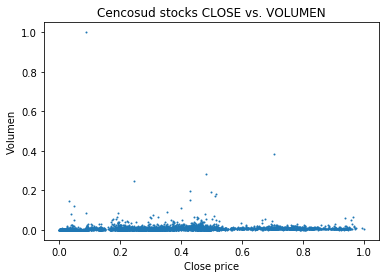

In [37]:
%%time
#%% Representación gráfica de los datos.
x = df_escalado['Close'].values
y = df_escalado['Volumen'].values
plt.xlabel('Close price')
plt.ylabel('Volumen')
plt.title('Cencosud stocks CLOSE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=1)

Wall time: 30.7 s


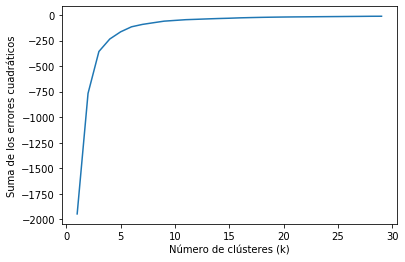

In [38]:
%%time
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

In [39]:
%%time
# Aplicación de k-means con k = 5
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.36278289 0.27009702 0.26908851 0.26843282 0.26991744 0.26991746
  0.00902185]
 [0.87231819 0.30388363 0.30396971 0.30092443 0.30360276 0.339027
  0.00473024]
 [0.58359852 0.77560482 0.77130558 0.76871719 0.775406   0.7856943
  0.00902052]
 [0.12654552 0.04791485 0.04767024 0.04936764 0.04788591 0.04788592
  0.0030492 ]
 [0.6460276  0.47044141 0.46760988 0.46718303 0.47022563 0.49219997
  0.00899309]]
Wall time: 565 ms


In [40]:
%%time
# Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)
data['label'] = labels

Wall time: 115 ms


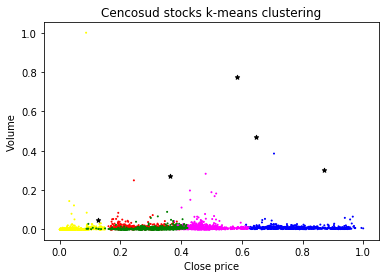

Wall time: 2.25 s


In [41]:
%%time
#%% Plot k-means clustering.
#colores=['red','green','blue','yellow','fuchsia']
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Close price')
plt.ylabel('Volume')
plt.title('Cencosud stocks k-means clustering')
plt.show()

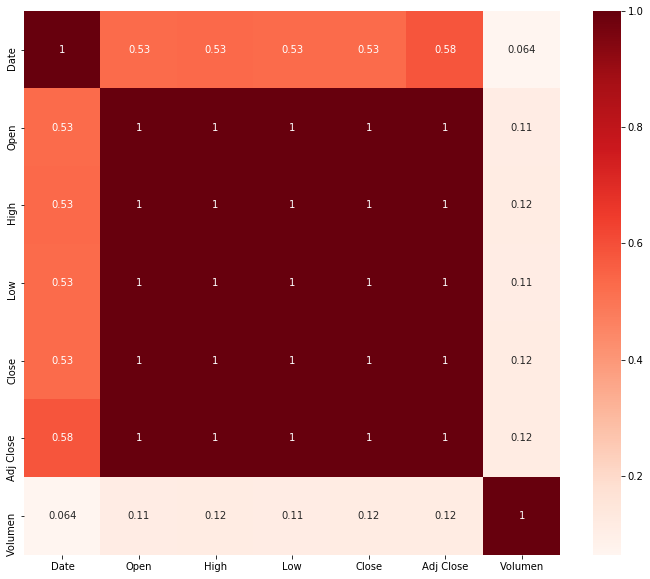

Wall time: 3.06 s


In [42]:
%%time
#Usando la correlación de Pearson

plt.figure (figsize = (12,10))
cor = df_escalado.corr ()
sns.heatmap (cor, annot = True, cmap = plt.cm.Reds)
plt.show ()

In [43]:
%%time
df_escalado.to_csv("DataLimpia.csv", index = False)


Wall time: 1.03 s


In [45]:
%%time
df_escalado

Wall time: 0 ns


Date      Open      High       Low     Close  Adj Close   Volumen
0     0.000000  0.071998  0.071604  0.074121  0.071998   0.071998  0.001068
1     0.000133  0.069629  0.070430  0.071002  0.069629   0.069629  0.000260
2     0.000267  0.070825  0.069256  0.071962  0.070825   0.070825  0.000608
3     0.000667  0.076807  0.075126  0.076760  0.076807   0.076807  0.000223
4     0.000801  0.079200  0.079821  0.081557  0.079200   0.079200  0.000147
...        ...       ...       ...       ...       ...        ...       ...
5199  0.999199  0.288976  0.285603  0.275277  0.288976   0.342359  0.001943
5200  0.999333  0.282070  0.291268  0.273852  0.282070   0.334470  0.001013
5201  0.999466  0.268375  0.273902  0.265097  0.268375   0.318825  0.001711
5202  0.999600  0.262282  0.266130  0.259570  0.262282   0.311864  0.001508
5203  1.000000  0.281141  0.281304  0.265097  0.281141   0.333409  0.001493

[5204 rows x 7 columns]